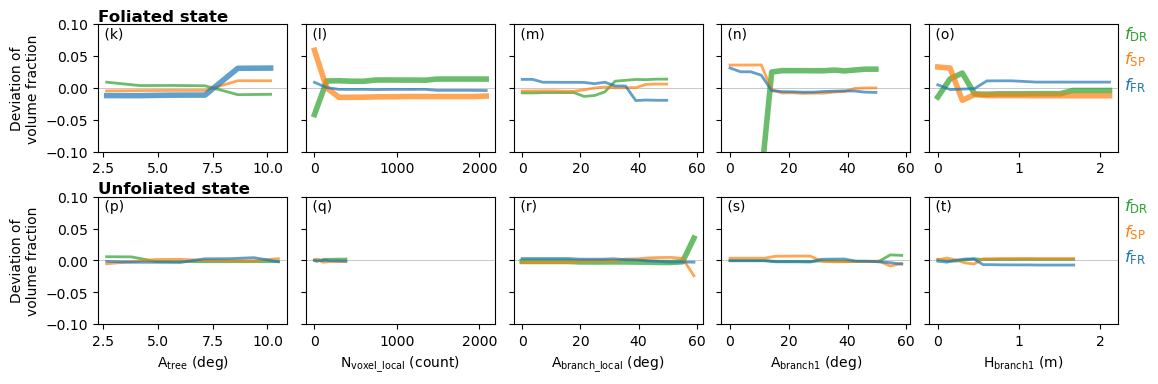

In [32]:
# visualization of pdp
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import numpy as np
import pandas as pd
import string

alphabet = list(string.ascii_lowercase)

L_factort_name = ['RR_OP','CR_OP','KE_OP','D50_OP','Dmax_OP','specie','D_BH',
                  'H_tree','A_tree','A_branch_all','L_branch_all','B_all','B_branch','B_leaf','B_branch/leaf','CPA',
                  'N_voxel_local','C_voxel_local','T_voxel_local','N_branch_local','A_branch_local',
                  'N_voxel_branch1','C_voxel_branch1','T_voxel_branch1','A_branch1','H_branch1','RCP']
L_xlab = ['RR$_{\mathrm{\_OP}}$','CR$_{\mathrm{\_OP}}$','KE$_{\mathrm{\_OP}}$','D$_{\mathrm{50\_OP}}$','D$_{\mathrm{Max\_OP}}$',
    'Specie','D$_{\mathrm{BH}}$','H$_{\mathrm{tree}}$','A$_{\mathrm{tree}}$','A$_{\mathrm{branch-all}}$','A$_{\mathrm{branch-all}}$','B$_{\mathrm{all}}$','B$_{\mathrm{branch}}$','B$_{\mathrm{leaf}}$','B$_{\mathrm{ratio}}$','$\it{\mathrm{CPA}}$',
    'N$_{\mathrm{voxel\_local}}$','C$_{\mathrm{voxel\_local}}$','T$_{\mathrm{voxel\_local}}$','N$_{\mathrm{branch\_local}}$','A$_{\mathrm{branch\_local}}$',
    'N$_{\mathrm{voxel\_branch1}}$','C$_{\mathrm{voxel\_branch1}}$','T$_{\mathrm{voxel\_branch1}}$','A$_{\mathrm{branch1}}$','H$_{\mathrm{branch1}}$','RCP']
L_xlab_unit =['(mm h$^{-1}$)', '(mm)', '(J m$^{-2}$ mm$^{-1}$)', '(mm)', '(mm)', '',
    '(cm)', '(m)', '(deg)', '(deg)', '(m)', '(g)', '(g)', '(g)', '', '(m$^{2}$)',
    '(count)', '', '(m)', '(count)', '(deg)',
    '(count)', '', '(m)', '(deg)', '(m)', '(m)']

L_factor_range = [[-8.7328065,191.2343565],[-2.3527375,52.4929875],[1.111224622,17.31361593],[0.65744117,1.759861474],[0.8430055,7.9460025],[0,0],[2.055,5.245],[2.734,5.946],[2.256940061,10.89158943],[16.15265152,47.0165404],[25.63175916,78.52173696],[711.2055,3606.7245],[62.8415,1420.4285],[-53.215,1117.515],[-0.294269552,6.1796606],[0.006378062,4.209709526],[-104.15,2187.15],[-0.05,1.05],[3.1815,-0.1515],[-0.55,11.55],[-2.9495605,61.9407705],[-16,336],[-0.030666667,0.644],[-0.0129375,0.2716875],[-2.922469,61.371849],[-0.10564515,2.21854815],[0.161120677,1.039946634]]

# =================================================================
def figSave():
    title = f'PDP - {title1}_{title2}'
    Fname = f'output/{title}.png'
    fig.savefig(Fname, dpi=300)

def figPreparation():
    fig = plt.figure(figsize=(12, 8/2))
    fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15, top=0.9, hspace=0.35, wspace=0.1)
    gs = fig.add_gridspec(2, 5)

    return fig, gs

# =================================================================
def dataPreparation():

    df = pd.read_csv(f'{parent_folder}/relativeImportance.txt')
    condition1 = df['Interval'] == 2
    condition2 = df['Tree'] == 'all'
    df_ri = df[condition1 & condition2]

    df = pd.read_csv(f'{parent_folder}/partialDependence.txt')
    condition1 = df['Interval'] == 2
    condition2 = df['Tree'] == 'all'
    df_pdp = df[condition1 & condition2]

    return df_ri, df_pdp

# =================================================================
def figDraw():

    graphColor = ["tab:green", "tab:orange", "tab:blue", "tab:green", "tab:orange"]

    for fctN in range(10):
        if(fctN < 5):
            leaf = 'F'
        else:
            leaf = 'U'

        ax = fig.add_subplot(gs[int(fctN/5), fctN%5])
        if target_exp == 'rain':
            ax.text(0.01, 0.98, f' ({alphabet[fctN]})', verticalalignment='top', transform=ax.transAxes, fontsize=10)
        else:
            ax.text(0.01, 0.98, f' ({alphabet[fctN+10]})', verticalalignment='top', transform=ax.transAxes, fontsize=10)

        # x-axis
        ax.set_xlim(L_factor_range[L_fct[int(fctN%5)]])
        ax.xaxis.set_major_locator(ticker.AutoLocator())

        # y-axis
        if(fctN%5 == 0):
            if target_obj == 'fraction':
                ax.set_ylabel(f'Deviation of\nvolume fraction')
            else:
                ax.set_ylabel(f'Deviation of\n$D_{{50}}$ (mm)')
        else:
            ax.set_yticklabels([])

        if target_obj == 'fraction':
            ax.set_ylim([-0.1, 0.1])
        else:
            ax.set_ylim([-0.3, 0.3])

        ax.axhline(c='#666666', alpha=0.5, lw=0.5)

        # data
        fctE = L_factort_name[L_fct[int(fctN%5)]]
        dfF = df_pdp.query('Foliation == @leaf and var == @fctE')

        for i in range(len(A_obj)):
            yvar = A_obj[i]

            # calculate mean
            df = pd.read_csv(f'{parent_folder}/dataset_02min.txt')
            mean_obj = df[yvar][df['Foliation'] == leaf].mean()

            # Extraction of the top five RI
            data = df_ri.query('Foliation == @leaf and obj == @yvar')
            data = data.iloc[0,9:]
            data = data/np.sum(data)

            # if(data.iloc[int(fctN%5)] < sorted(data.dropna())[-5]):
            if(data[fctE] < sorted(data.dropna())[-5]):
                lwN = 2
            else:
                lwN = 4

            # Extraction of the top five pdp
            x = dfF.query('obj == @yvar').iloc[0,5:56]
            x = x.astype('float64')
            y = (dfF.query('obj == @yvar').iloc[0,56:107] - mean_obj)
            y = y.astype('float64')

            ax.plot(x, y, alpha=0.7, lw=lwN, color=graphColor[i], label=L_obj[i])

            if(fctN>4):
                ax.set_xlabel(f'{L_xlab[L_fct[int(fctN%5)]]} {L_xlab_unit[L_fct[int(fctN%5)]]}')

        if(fctN%5 == 4):
            for i in range(len(L_obj)):
                    ax.text(1.03, 1-0.2*i, L_obj[i], transform=ax.transAxes, verticalalignment='top', fontsize=12, color=graphColor[i])

        if(fctN == 0):
            ax.text(0, 1, 'Foliated state', transform=ax.transAxes, verticalalignment='bottom', fontsize=12, fontweight='bold')
        if(fctN == 5):
            ax.text(0, 1, 'Unfoliated state', transform=ax.transAxes, verticalalignment='bottom', fontsize=12, fontweight='bold')


# =================================================================
parent_folder = f'xxxx'

target_obj = 'fraction'  # fraction, d50
target_exp = 'crown'  # rain, crown

if target_obj == 'fraction':
    A_obj = ['fDR', 'fSP', 'fFR']
    L_obj=['$f_{\mathrm{DR}}$','$f_{\mathrm{SP}}$','$f_{\mathrm{FR}}$']
    title1 = 'fraction'
elif target_obj == 'd50':
    A_obj = ['D50_DR', 'D50_SP']
    L_obj=['D$_{\mathrm{50\_DR}}$','D$_{\mathrm{50\_SP}}$']
    title1 = 'dropsize'
else:
    print(f'Your target objective variables [{target_obj}] is incorrect')
    exit

if target_exp == 'rain':
    L_fct = [0,1,2,3,4]
    title2 = 'rain'
elif target_exp == 'crown':
    L_fct = [8,16,20,24,25]
    title2 = 'crown'
else:
    print(f'Your target experimental variables [{target_exp}] is incorrect')
    exit


fig, gs = figPreparation()
df_ri, df_pdp = dataPreparation()
figDraw()
# figSave()


   Interval Foliation Tree     obj     n  mtry        R2      RMSE       MAE  \
0         2         F  all     fDR  3295    16  0.898700  0.062236  0.039978   
1         2         F  all     fSP  3295    12  0.755404  0.079333  0.057548   
2         2         F  all     fFR  3295     9  0.724078  0.073862  0.053740   
3         2         F  all  D50_DR  3295     9  0.768731  0.522890  0.283503   
4         2         F  all  D50_SP  3295     9  0.825266  0.064377  0.043732   
5         2         U  all     fDR  4840     5  0.875699  0.034856  0.015850   
6         2         U  all     fSP  4840     9  0.628239  0.107865  0.082553   
7         2         U  all     fFR  4840     9  0.514444  0.111118  0.085972   
8         2         U  all  D50_DR  4840     9  0.716295  0.454919  0.234684   
9         2         U  all  D50_SP  4840     9  0.739244  0.079589  0.043495   

        RR_OP  ...  C_voxel_local  T_voxel_local  N_branch_local  \
0    4.787409  ...       5.794948       1.401458   